# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Julian Tegar Rangga Pranata
- **Email:** juliantegar92@gmail.com / a006ybf240@devacademy.id
- **ID Dicoding:** juliantegar

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda 2 tahun terakhir?
- Bagaimana pola penggunaan sepeda berdasarkan waktu (jam dan hari)?
- Bagaimana pola penggunaan sepeda berdasarkan musim dan cuaca?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Data Wrangling

### Gathering Data

In [2]:
from google.colab import files
day = files.upload()
hour = files.upload()

**Insight:**
- Mengimport kedua dataset

In [3]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Melihat bentuk dataset menggunakan .head()

In [4]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Melihat bentuk dataset menggunakan .head()

### Assessing Data

In [5]:
'''Cek struktur data'''
print([day_df.info(),hour_df.info()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Melihat informasi tipe data dan jumlah nilai non-null dari kedua dataset

In [6]:
'''Cek duplikasi data'''
print([day_df.duplicated().sum(),hour_df.duplicated().sum()])

[0, 0]


**Insight:**
- Mengecek duplikasi data pada masing-masing dataset

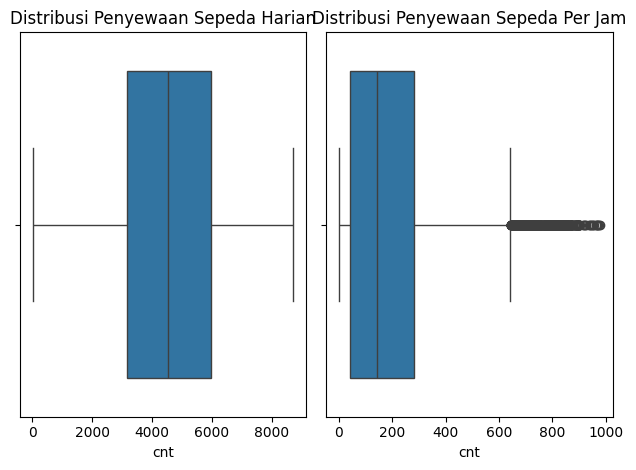

In [7]:
'''Cek outliers (Boxplot)'''
plt.subplot(1, 2, 1)
sns.boxplot(x=day_df['cnt'])
plt.title("Distribusi Penyewaan Sepeda Harian")

plt.subplot(1, 2, 2)
sns.boxplot(x=hour_df['cnt'])
plt.title("Distribusi Penyewaan Sepeda Per Jam")

plt.tight_layout()
plt.show()

**Insight:**
- Terdapat banyak outlier pada dataset hour_df
- Tidak dilakukan penyesuaian outlier karena dapat menjadi informasi tertentu

### Cleaning Data

## Memperbaiki Tipe Data

In [8]:
datasets={'day':day_df,'hour':hour_df}
for name, df in datasets.items():
  df['dteday']=pd.to_datetime(df['dteday'])
print(day_df.info(),hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Penyesuaian variabel dteday pada kedua dataset

## Mengubah nilai kategori

In [9]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [10]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore hour_df

In [11]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [12]:
jam_sewa=hour_df.groupby(by='hr').agg({
    'cnt': ['min', 'mean', 'max'],
}).reset_index()
print(jam_sewa)

    hr cnt                 
       min        mean  max
0    0   2   53.898072  283
1    1   1   33.375691  168
2    2   1   22.869930  132
3    3   1   11.727403   79
4    4   1    6.352941   28
5    5   1   19.889819   66
6    6   1   76.044138  213
7    7   1  212.064649  596
8    8   5  359.011004  839
9    9  14  219.309491  426
10  10   8  173.668501  539
11  11  10  208.143054  663
12  12   3  253.315934  776
13  13  11  253.661180  760
14  14  12  240.949246  750
15  15   7  251.233196  750
16  16  11  311.983562  783
17  17  15  461.452055  976
18  18  23  425.510989  977
19  19  11  311.523352  743
20  20  11  226.030220  567
21  21   6  172.314560  584
22  22   9  131.335165  502
23  23   2   87.831044  256


**Insight:**
- Rata-rata penggunaan sepeda terindikasi banyak pada jam pulang dan pergi kantor (8-9 dan 17-19)

## Explore day_df

In [13]:
hari_sewa = day_df.groupby(['workingday', 'weekday'])['cnt'].mean().reset_index()
print(hari_sewa)

    workingday  weekday          cnt
0            0        0  4228.828571
1            0        1  3973.666667
2            0        2  1013.000000
3            0        3  7403.000000
4            0        4  1960.000000
5            0        5  3247.000000
6            0        6  4550.542857
7            1        1  4398.866667
8            1        2  4544.621359
9            1        3  4520.825243
10           1        4  4720.343137
11           1        5  4718.588235


**Insight:**
Rata-rata penggunaan sepeda tinggi tiap harinya, namun terkecuali pada selasa dan kamis saat libur

## Visualization & Explanatory Analysis

## Pertanyaan 1:
Bagaimana pola penggunaan sepeda 2 tahun terakhir?

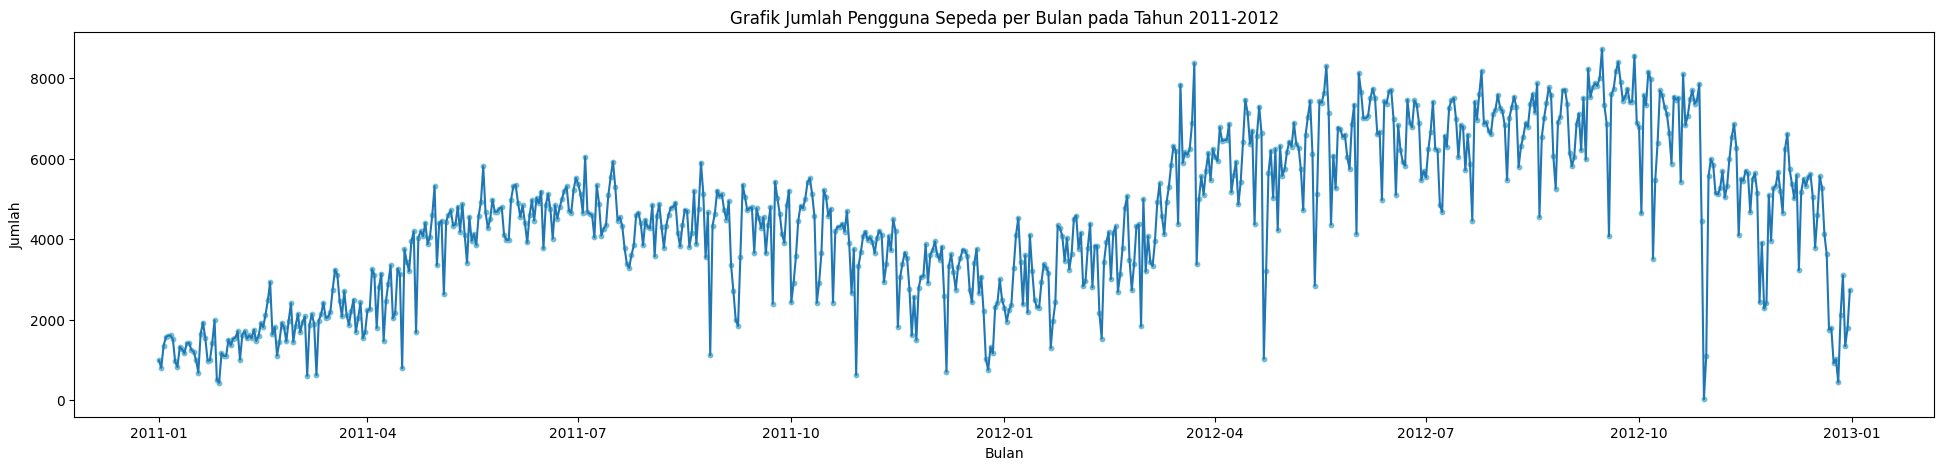

In [14]:
plt.figure(figsize=(24,5))
monthly_means=day_df['cnt'].groupby(day_df['dteday']).mean()
plt.scatter(monthly_means.index, monthly_means.values, c="#72BCD4", s=10, marker='o')
plt.plot(monthly_means.index, monthly_means.values)
plt.xlabel('Bulan')
plt.ylabel('Jumlah')
plt.title('Grafik Jumlah Pengguna Sepeda per Bulan pada Tahun 2011-2012')
plt.show()

**Insight:**
- Penggunaan sepeda tiap harinya mengalami fluktuatif
- Terbentuk seasonal 3 bulan sekali

### Pertanyaan 2:
Bagaimana pola penggunaan sepeda berdasarkan waktu (jam dan hari)?

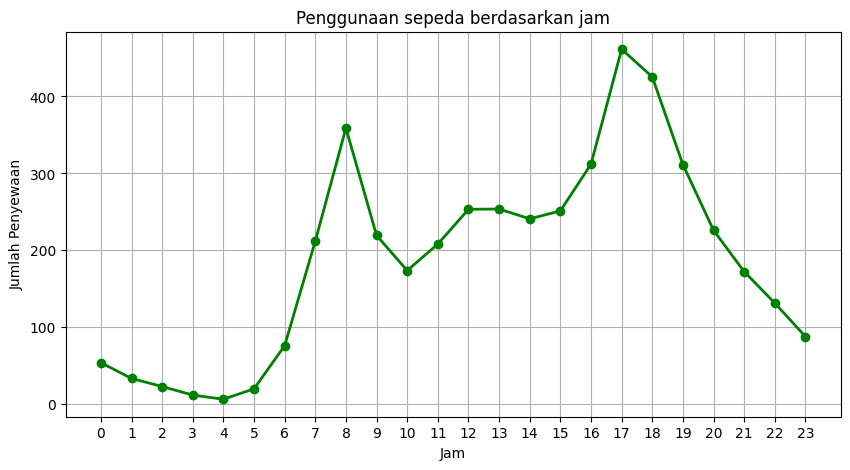

In [15]:
plt.figure(figsize=(10,5))
plt.plot(jam_sewa['hr'], jam_sewa[('cnt','mean')], marker='o',linewidth=2, color='green')
plt.title('Penggunaan sepeda berdasarkan jam')
plt.xlabel('Jam')
plt.xticks(jam_sewa['hr'])
plt.ylabel('Jumlah Penyewaan')
plt.grid(True)
plt.show()

**Insight:**
- Volume penggunaan sepeda tinggi disaat jam kerja, dengan pola melonjak di saat rush hour

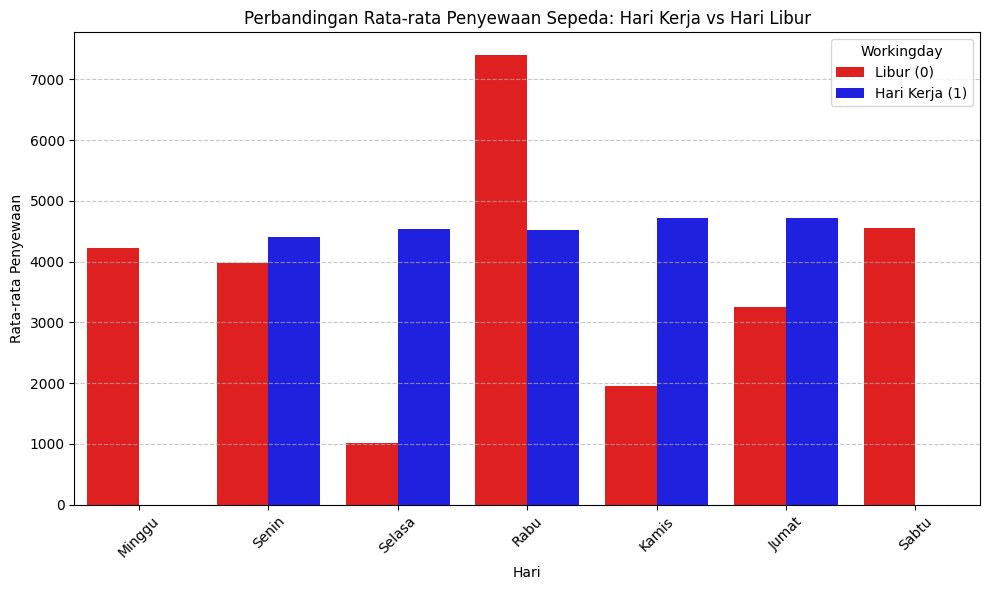

In [16]:
day_mapping = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}
hari_sewa['weekday'] = hari_sewa['weekday'].map(day_mapping)
plt.figure(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', hue='workingday', data=hari_sewa, palette=['red', 'blue'])
plt.title('Perbandingan Rata-rata Penyewaan Sepeda: Hari Kerja vs Hari Libur')
plt.xlabel('Hari')
plt.ylabel('Rata-rata Penyewaan')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Libur (0)', 'Hari Kerja (1)'], title="Workingday")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Pada hari libur penggunaan sepeda tertinggi pada hari rabu, sedangkan terendah pada hari selasa.
- Sebaliknya, penggunaan sepeda pada hari kerja secara rata-rata tidak begitu terlihat perbedaannya.

### Pertanyaan 3:
Bagaimana pola penggunaan sepeda berdasarkan musim dan cuaca?

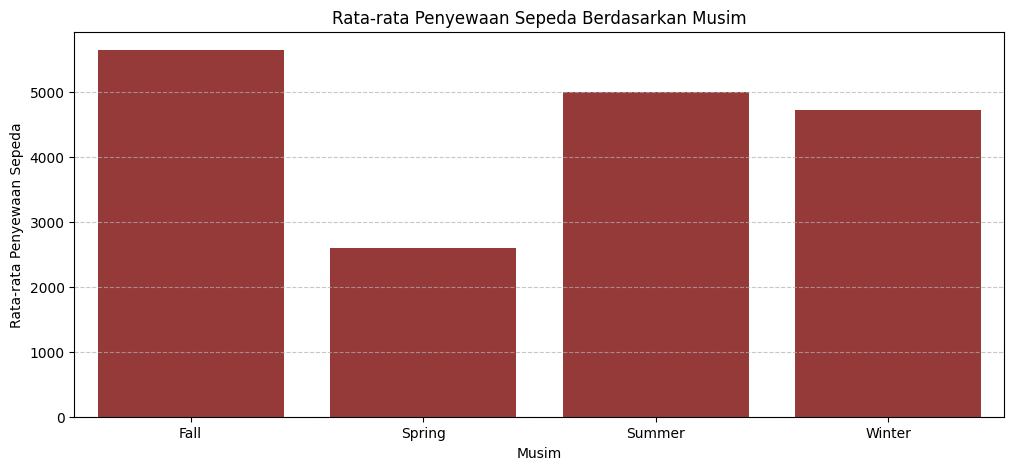

In [17]:
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
day_df['season'] = day_df['season'].replace(season_mapping)
season_usage = day_df.groupby('season')['cnt'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.barplot(x='season', y='cnt', data=season_usage, color='brown')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- Penggunaan sepeda tertinggi dan terendah secara rata-rata terletak pada musing gugur dan panas

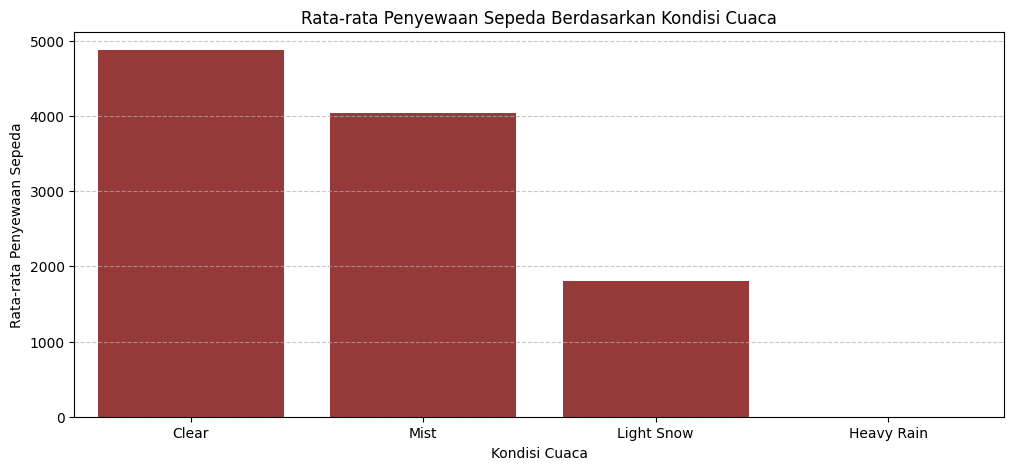

In [18]:
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow', 4: 'Heavy Rain'}
day_df['weathersit'] = day_df['weathersit'].replace(weather_mapping)
all_weather = pd.DataFrame({'weathersit': ['Clear', 'Mist', 'Light Snow', 'Heavy Rain']})
weather_usage = day_df.groupby('weathersit')['cnt'].mean().reset_index()
weather_usage = all_weather.merge(weather_usage, on='weathersit', how='left').fillna(0)

plt.figure(figsize=(12, 5))
sns.barplot(x='weathersit', y='cnt', data=weather_usage, color='brown')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Insight:**
- Penggunaan sepeda tertinggi dan terendah secara rata-rata saat cuaca sedang cerah dan hujan badai

## Analisis Lanjutan (Opsional)

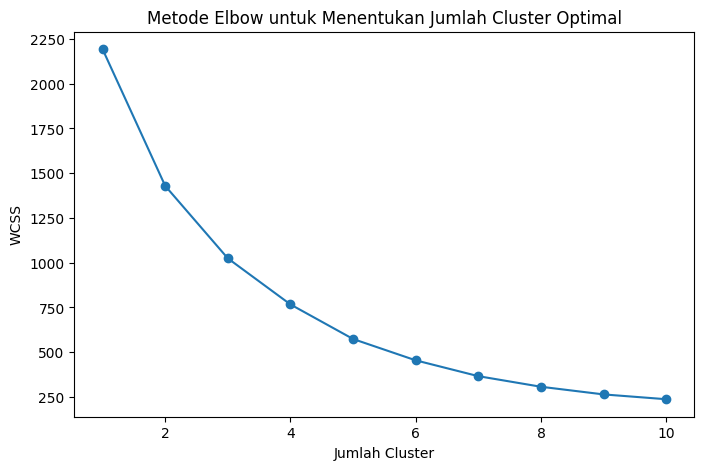

In [19]:
label_encoder = LabelEncoder()
day_df['season'] = label_encoder.fit_transform(day_df['season'])
day_df['weathersit'] = label_encoder.fit_transform(day_df['weathersit'])

df_cluster = day_df[['season', 'weathersit', 'cnt']]

scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_cluster_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()

**Insight:**
- Titik belok ekstream terletak pada x=3, sehingga jumlah cluster optimal=3

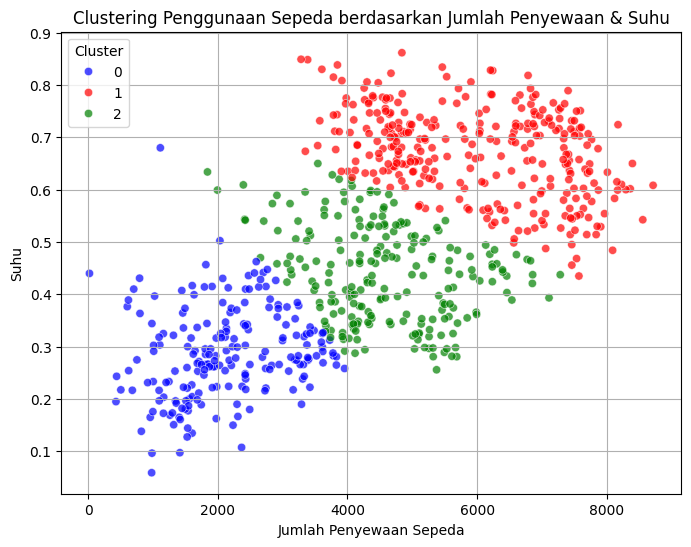

In [20]:
X = day_df[['cnt', 'temp']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
day_df['cluster'] = kmeans.fit_predict(X_scaled)


plt.figure(figsize=(8,6))
sns.scatterplot(x=day_df['cnt'], y=day_df['temp'], hue=day_df['cluster'], palette=['blue', 'red', 'green'], alpha=0.7)
plt.title('Clustering Penggunaan Sepeda berdasarkan Jumlah Penyewaan & Suhu')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Suhu')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

**Insight:**
- Cluster 1 (Biru) : jumlah penggunaan sepeda dan suhu yang rendah.
- Cluster 2 (Merah) : jumlah penggunaan sepeda dan suhu yang tinggi.
- Cluster 3 (Hijau) : jumlah penggunaan sepeda dan suhu yang menengah.

Dari klaster yang terbentuk didapatkan cukup bukti bahwa semakin tinggi suhu semakin bertambah pula jumlah penggunaan sepeda.

In [21]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.0 MB/s eta 0:00:00


In [22]:
!wget -q -O - ipv4.icanhazip.com

34.145.174.201


In [ ]:
! streamlit run dashboardandat.py & npx localtunnel --port 8501



⠙⠹
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.145.174.201:8501

⠸⠼⠴your url is: https://twelve-phones-lead.loca.lt


## Conclusion

- Pada tiap harinya, penggunaan sepeda relatif cukup tinggi, baik pada saat hari kerja maupun hari libur. Akan tetapi, terkecuali pada hari selasa dan kamis saat hari libur.
- Penggunaan sepeda tergolong lebih banyak digunakan pada saat cuaca sedang cerah dan di musim yang hangat hingga panas.